<a href="https://colab.research.google.com/github/Devmurthy/AudioVisionary/blob/main/AutoRegressive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [7]:
%matplotlib inline


In [8]:
file_path = "/content/ts_data.xlsx"
df = pd.read_excel(file_path)
df.head()

,Time,Value
0,1,0.000000
1,2,-0.090263
2,3,0.749995
3,4,1.247887
4,5,0.131282


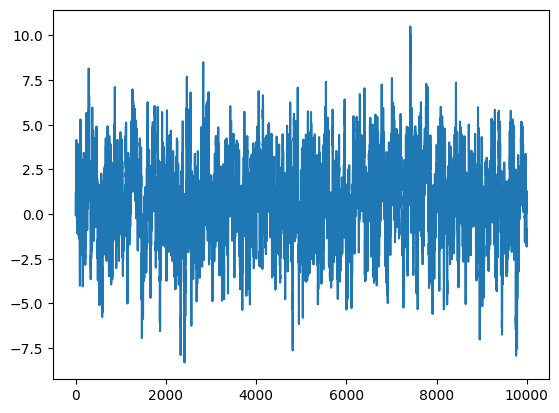

In [9]:
df.shape
plt.plot(df["Value"])

In [10]:
X = df["Value"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -22.184930
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


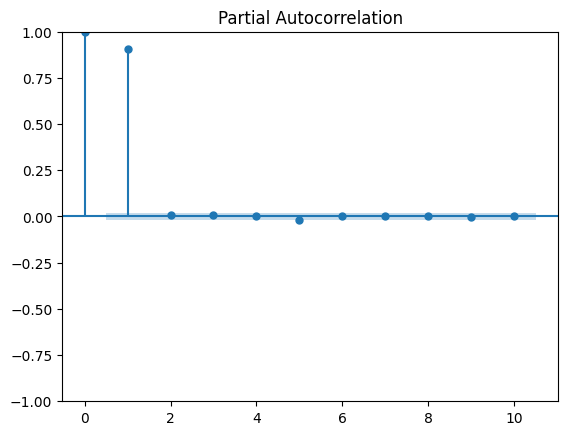

In [11]:
plot_pacf(X, lags=10);

In [12]:
df["Values_shifted"]  = df["Value"].shift()
df.head()

,Time,Value,Values_shifted
0,1,0.000000,NaN
1,2,-0.090263,0.000000
2,3,0.749995,-0.090263
3,4,1.247887,0.749995
4,5,0.131282,1.247887


In [13]:
df.drop('Time', axis = 1, inplace=True)
df.dropna(inplace=True)
df.head()

,Value,Values_shifted
1,-0.090263,0.000000
2,0.749995,-0.090263
3,1.247887,0.749995
4,0.131282,1.247887
5,0.562619,0.131282


In [14]:
y = df.Value.values
X = df.Values_shifted.values
train_size = int(len(X) * 0.80)
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]


X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)


lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [15]:
lr.coef_

array([0.90550879])

In [16]:
lr.intercept_

np.float64(0.06868111625452289)

In [17]:
y_pred = lr.predict(X_test)

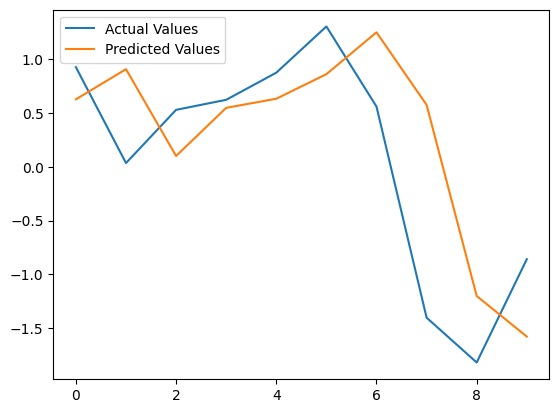

In [18]:
plt.plot(y_test[-10:], label="Actual Values")
plt.plot(y_pred[-10:], label="Predicted Values")
plt.legend()
plt.show()



In [22]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y_train, order=(1, 0, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 7999
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -11364.832
Date:                Wed, 02 Apr 2025   AIC                          22735.664
Time:                        08:16:11   BIC                          22756.625
Sample:                             0   HQIC                         22742.838
                               - 7999                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7245      0.119      6.113      0.000       0.492       0.957
ar.L1          0.9055      0.005    189.833      0.000       0.896       0.915
sigma2         1.0035      0.016     62.497      0.0